# TDA Breakout Day 2 Notebook

In this notebook, you will use persistent homology to uncover features in noisy data.

To run this notebook, you may need to install some libraries. Most of them can be installed with pip: simply type `pip install [library name]` in your terminal. If that doesn't work, let us know. We will need `numpy`, `ripser`, `persim` at the very least.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams 


# Extracting shape from noisy data

## Random point cloud

We begin by defining a toy dataset with no shape. Let's just take a bunch of random points in the plane.

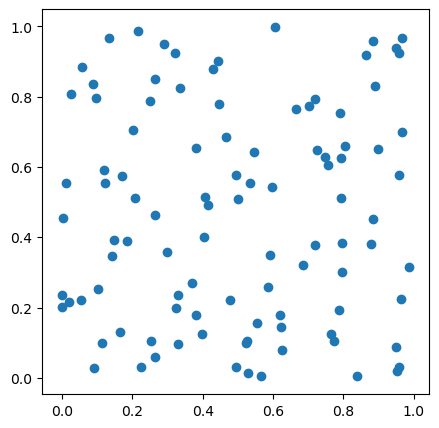

In [26]:
data = np.random.random((100,2)) # Define a random point cloud of 100 points in the plane
fig = plt.figure(figsize=(5,5)) # Create a figure to display the random point cloud
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1]) # Plot the data on the axes. +b plots as a scatter plot of blue + signs.
ax.axis('equal'); # Set the aspect ratio to use equal axis scales.

Now we compute the persistent homology of the dataset. This is done by applying the `ripser` function. Ripser has lots of options, such as range of dimensions to compute, type of data etc.

In [27]:
ripserData = ripser(data)

Let's take a look at the output of ripser, just to see everything we get.

In [28]:
ripserData

{'dgms': [array([[0.        , 0.00561754],
         [0.        , 0.01204779],
         [0.        , 0.01514788],
         [0.        , 0.0236152 ],
         [0.        , 0.02383488],
         [0.        , 0.02384789],
         [0.        , 0.02428442],
         [0.        , 0.0253647 ],
         [0.        , 0.02710396],
         [0.        , 0.02740332],
         [0.        , 0.03177428],
         [0.        , 0.03202181],
         [0.        , 0.03288376],
         [0.        , 0.03391669],
         [0.        , 0.03538896],
         [0.        , 0.0360832 ],
         [0.        , 0.03655003],
         [0.        , 0.0366323 ],
         [0.        , 0.0372259 ],
         [0.        , 0.03736772],
         [0.        , 0.03746939],
         [0.        , 0.03916714],
         [0.        , 0.0421862 ],
         [0.        , 0.04269627],
         [0.        , 0.04393933],
         [0.        , 0.04485626],
         [0.        , 0.04549941],
         [0.        , 0.04574315],
         [0.

The types of things that ripser computed are listed under various 'keys'. Let's take a look at those.

In [29]:
ripserData.keys()

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])

The computation that we really care about is under the 'dgms' key. This is our persistence diagram. 

In [30]:
diagrams = ripser(data, maxdim=2)['dgms'] # Pick off the dgms part of the ripser output
print(diagrams) # Look at the the output

[array([[0.        , 0.00561754],
       [0.        , 0.01204779],
       [0.        , 0.01514788],
       [0.        , 0.0236152 ],
       [0.        , 0.02383488],
       [0.        , 0.02384789],
       [0.        , 0.02428442],
       [0.        , 0.0253647 ],
       [0.        , 0.02710396],
       [0.        , 0.02740332],
       [0.        , 0.03177428],
       [0.        , 0.03202181],
       [0.        , 0.03288376],
       [0.        , 0.03391669],
       [0.        , 0.03538896],
       [0.        , 0.0360832 ],
       [0.        , 0.03655003],
       [0.        , 0.0366323 ],
       [0.        , 0.0372259 ],
       [0.        , 0.03736772],
       [0.        , 0.03746939],
       [0.        , 0.03916714],
       [0.        , 0.0421862 ],
       [0.        , 0.04269627],
       [0.        , 0.04393933],
       [0.        , 0.04485626],
       [0.        , 0.04549941],
       [0.        , 0.04574315],
       [0.        , 0.05014039],
       [0.        , 0.05181683],
       [0

We see that the output of diagrams is a pair of arrays. These are points in the persistence diagram for degree-0 and degree-1 persistent homology, respectively. We can now plot these diagrams. This can be done on separate axes, or on the same axis.

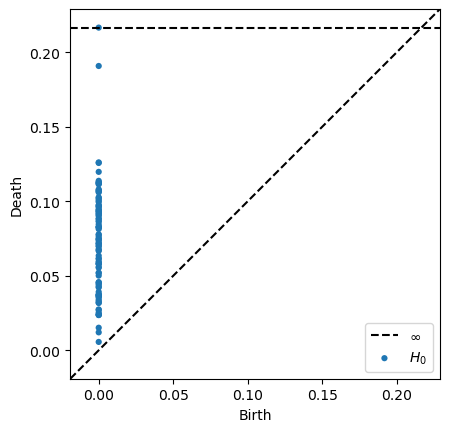

In [31]:
plot_diagrams(diagrams[0]) # Just degree-0

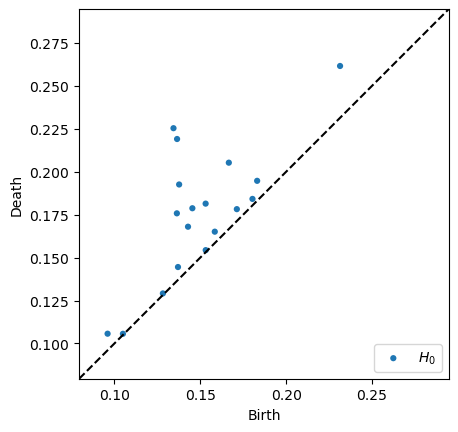

In [32]:
plot_diagrams(diagrams[1]) # Just degree-1

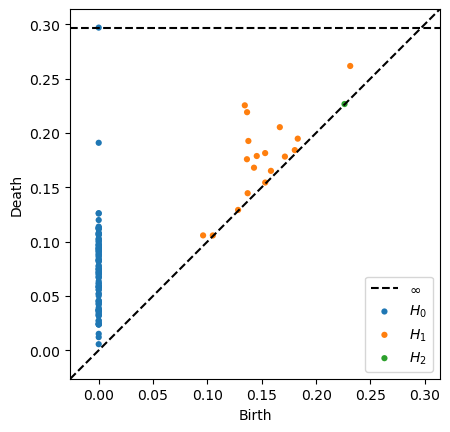

In [33]:
plot_diagrams(diagrams) # Both degree-0 and degree-1

Pause for a moment and look at this diagram. Make sure you understand what the axes mean and what the points mean. Is there signal here? Which dots almost definitely represent noise? Which dots are harder to classify as noise or signal?

## Circles and blobs

Let's make a data set with more structure. The kind of data we are about to create is notoriously hard for clustering algorithms to find shape in. Do you know any clustering algorithms? Would they be able to separate the two circles?

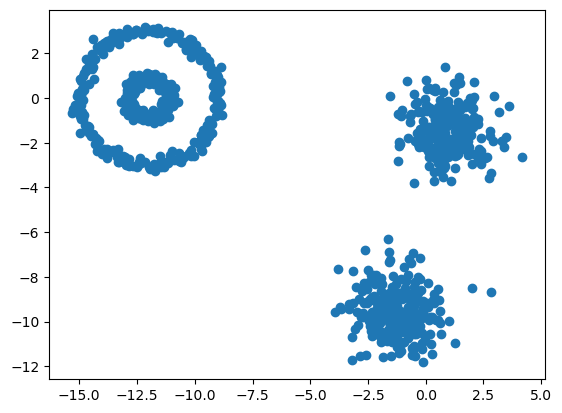

In [34]:
# Import packages for creating toy datasets and plotting
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# Create two datasets using above functions
X1, y1 = make_circles(n_samples=500, noise = 0.05, factor=0.3, random_state = 3)
X2, y2 = make_blobs(n_samples=500, centers=2, center_box = (-10,10), random_state=2)

# Combine the toy datasets. The first one is scaled and translated.
X = np.concatenate((3*X1-np.array([[12,0]]),X2),axis=0)

# Plot the result
plt.scatter(X[:,0],X[:,1]);

Let's compute the persistence diagram for this data.

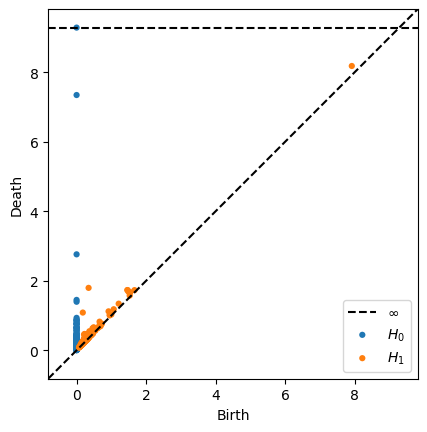

In [35]:
diagrams = ripser(X)['dgms']
plot_diagrams(diagrams)

Look at this diagram. Can you find the dots that capture the circles? Can you find the dots that capture the blobs?

## Circles and spheres

Let's examine the persistent homology of point clouds on spheres. First we define a function to randomly sample from Euclidean spheres. Then we sample 250 points from a sphere in 3-space and plot the result.

In [36]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    sample = np.random.randn(ndim, npoints)
    sample /= np.linalg.norm(sample, axis=0)
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    sphere = sample_spherical(npoints, ndim)
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    sample = sphere + noise
    return sample

Let's first look at a circle sitting in $\mathbb{R}^2$.

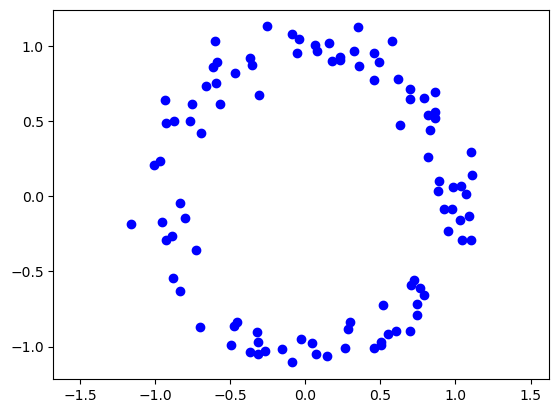

In [37]:
data = noisy_sample_spherical(100,2)
# Generate the noisy circle.

# Plot the data as a scatter plot.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob', label='Source samples');
ax1.axis('equal');

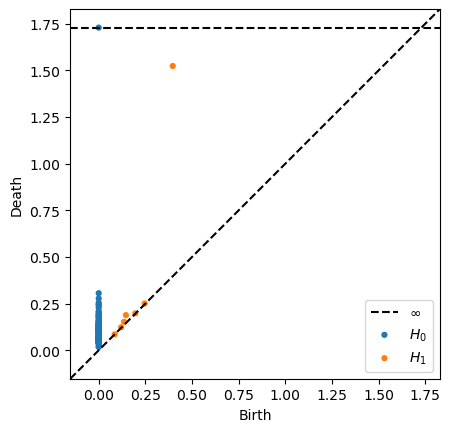

In [38]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

Once again, find the dot that captures the circle in the data. Playing with parameters, we can make the circle more densely sampled or much noisier. Note how the diagram changes as we do this.

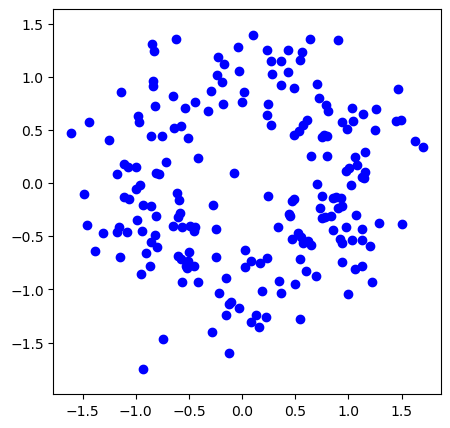

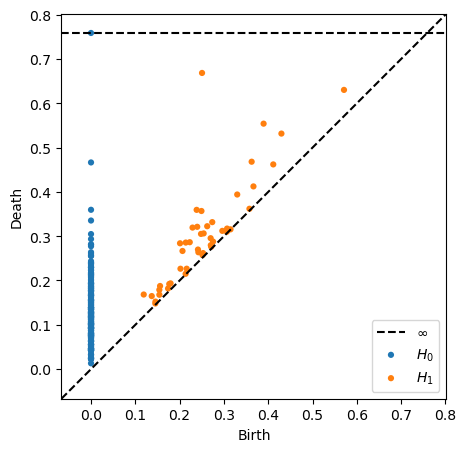

In [39]:
numsamp = 200
noise = .1

data = noisy_sample_spherical(numsamp,ndim=2,noise_level=noise)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob');
ax1.axis('equal')
dgms = ripser(data)['dgms']
fig2 = plt.figure(figsize=(5,5))
plot_diagrams(dgms, show=True)

Now let's compute the persistence diagrams for a sphere in $\mathbb{R}^3$. We can specify that we want to compute homology up to degree-2. We then plot the persistence diagrams on the same axes.

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

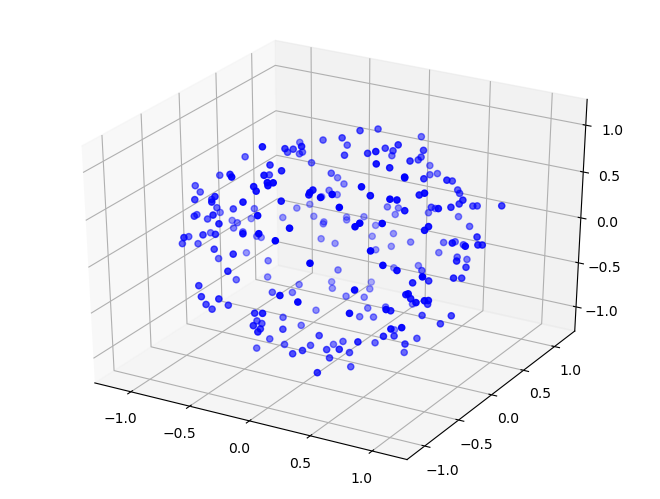

In [40]:
sphere = noisy_sample_spherical(250,3)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sphere[:,0],sphere[:,1],sphere[:,2], c='b', marker='o');
ax.set_aspect('equal');

Computation Time: 4.467025995254517 seconds


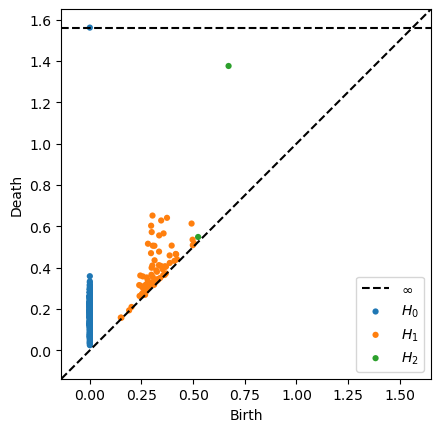

In [41]:
import time

start0 = time.time()
diagrams = ripser(sphere,maxdim=2)['dgms']
plot_diagrams(diagrams)
end0 = time.time()

print('Computation Time: ' + str(end0 - start0) + ' seconds')

Can you find the dot that represents the sphere? Remember, the sphere has one big hole in dimension 2.

# (optional) Filtering an Image

This example is adapted from one appearing in the documentation for Ripser https://github.com/scikit-tda/ripser.py.

The goal is to apply these techniques to study the following stock image of a dragonfly wing, available at <a href = "https://all-free-download.com/free-photos/download/dragonfly-wings_207742.html">this link</a>

<img src = "dragonfly_wings.jpg">

If we think of each pixel value as the output of a function, this image can be understood as the graph of a surface. If white pixels correspond to large function values, then we can imagine that the center of each 'cell' in the wing corresponds to a local max of the function. If we take the negative of our function, each cell corresponds to a local min.

We suspect that the degree-0 persistent homology of a sublevel set filtration of this graph would pick out these local mins as points with high persistence. The goal of this example is to test this intuition. 

## Processing the Image

We begin by converting the image to true greyscale, then smoothing it (creating a smoother surface graph). If you don't have PIL installed, type `pip install Pillow` in your terminal to install it.

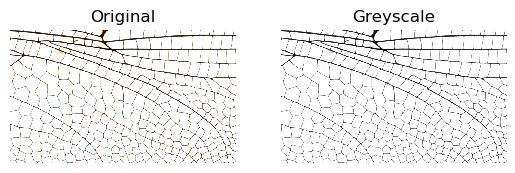

In [42]:
import PIL

wing_original = plt.imread("dragonfly_wings.jpg")
wing_grey = np.asarray(PIL.Image.fromarray(wing_original).convert('L'))

plt.subplot(121)
plt.title('Original')
plt.imshow(wing_original)
plt.axis('off')
plt.subplot(122)
plt.title('Greyscale')
plt.imshow(wing_grey, cmap='gray')
plt.axis('off')
plt.show()

When we smooth, we will add a small amount of noise to each pixel value. This is a *hack* to make the pixel values unique. It will help us plot later.

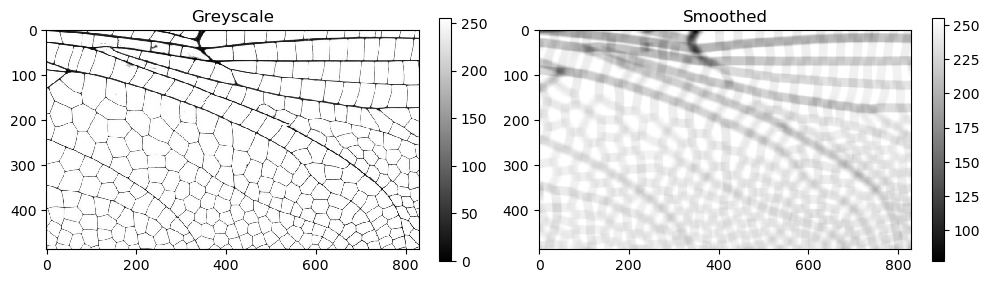

In [43]:
from scipy import ndimage

# Smooth the image using a moving average and add some random noise
smoothed = ndimage.uniform_filter(wing_grey.astype(np.float64), size=20)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Greyscale')
im = plt.imshow(wing_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.title('Smoothed')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

Now compute the sublevel set filtration for the image surface. Superlevel set filtrations for image data are built into `ripser` as `lower_star_img`. Recall that we take the negative of our surface to get white pixels to be local minima.

We display the persistence diagram with 'birth time' on the $x$-axis and 'lifetime' on the $y$-axis (lifetime = death time - birth time).

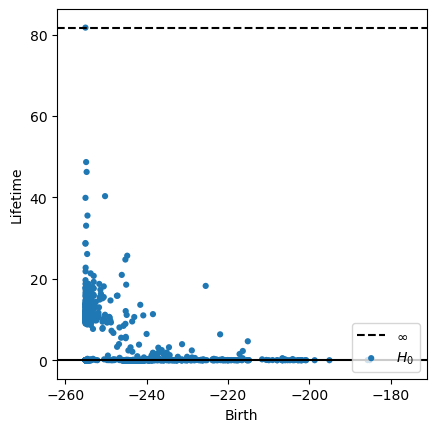

In [44]:
from ripser import lower_star_img

dgm = lower_star_img(-smoothed)
plot_diagrams(dgm, lifetime=True)
plt.show()

Looks like something interesting happens for lifetime around 5. Let's threshold there, then plot the pixels generating the homology classes on top of the original image.

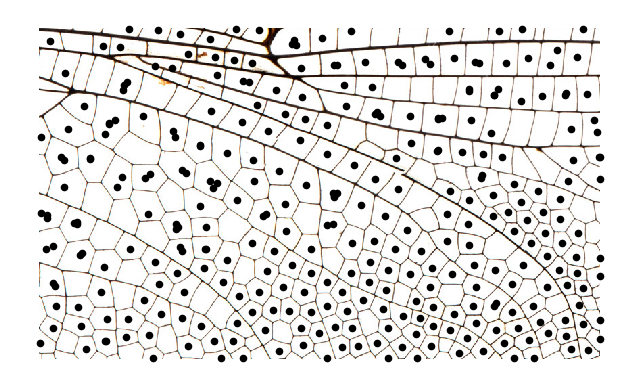

In [45]:
thresh = 5
# Create list of indices up to number of points in persistence diagram
idxs = np.arange(dgm.shape[0])
# Find indices of points with long persistence
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

# Plot original wing image
plt.figure(figsize=(8, 5))
plt.imshow(wing_original)

# Plot points generating high-persistence points in the diagram
X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()

This does a pretty good (not perfect!) job. We could play around with the noise levels and thresholds to see if we can get a better result. 